`Exploratory Data Analysis`

In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import cv2
import tqdm


warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

#Connecting the driver
from google.colab import drive

drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
root = '/content/drive/MyDrive/ML'
model = 'models'
#style_file = 'styles.csv'
image_folder_train = root + '/data/train/'
image_folder_train_o =image_folder_train + 'O/'
image_folder_train_r =image_folder_train + 'R/'

In [ ]:
def get_all_image_names_and_its_class_to_df(folder_name):
    #print(folder_name)
    df_local=pd.DataFrame(columns=['id','masterCategory'])
    for folder in os.listdir(folder_name):
      #print(folder)
      if folder != '.DS_Store':
            folder_path =os.path.join(folder_name,folder)
            #print(folder_path)
            temp_df=pd.DataFrame(columns=['id','masterCategory'])
            img_list=[]
            for img in os.listdir(folder_path):
                img_list.append(img)
            #print(folder)
            temp_df['id'] =img_list
            temp_df['masterCategory']= folder
            #print(temp_df)
            df_local = pd.concat([df_local, temp_df], ignore_index=True)
    return df_local



In [ ]:

# Loading all the images
df_train = get_all_image_names_and_its_class_to_df(image_folder_train)
print(df_train.shape)
print(df_train.head(10))
print(df_train['masterCategory'].value_counts())

(25077, 2)
           id masterCategory
0  R_9506.jpg              R
1  R_9613.jpg              R
2  R_9751.jpg              R
3  R_9872.jpg              R
4  R_9354.jpg              R
5  R_9943.jpg              R
6  R_9265.jpg              R
7  R_9280.jpg              R
8  R_9287.jpg              R
9  R_9210.jpg              R
O    13966
R    11111
Name: masterCategory, dtype: int64


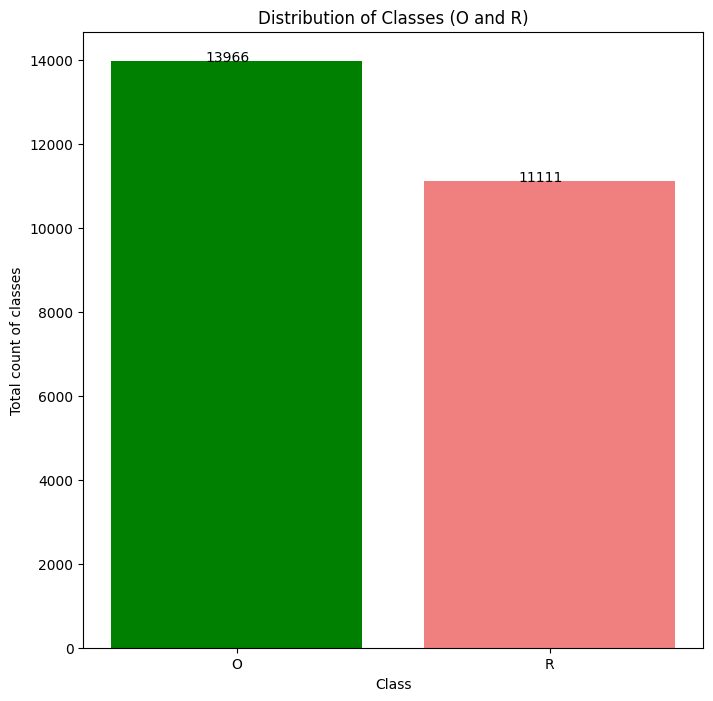

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
counts = df_train['masterCategory'].value_counts()

# Labels for the bar chart
y_labels = ['O', 'R']

# X-axis values
x_values = range(len(y_labels))

# Bar chart
plt.figure(figsize=(8, 8))
bars = plt.bar(x_values, counts[:2], color=['Green', 'lightcoral'])

# Display count values on each bar
for bar, count in zip(bars, counts[:2]):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, str(count), fontsize=10)

plt.xlabel('Class')
plt.ylabel('Total count of classes')
plt.xticks(x_values, y_labels)
plt.title('Distribution of Classes (O and R)')
plt.show()

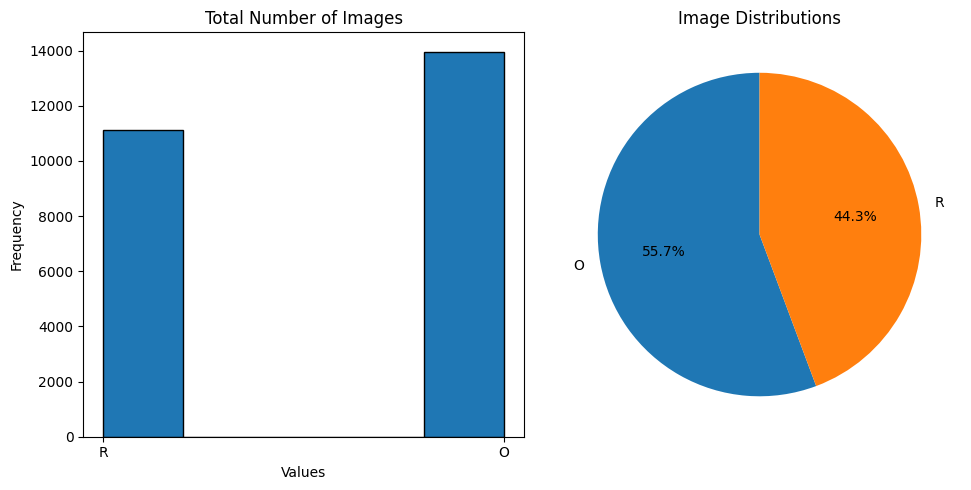

In [ ]:
plt.figure(figsize=(10, 5))

# Plotting histogram in the first subplot
plt.subplot(1, 2, 1)
plt.hist(df_train['masterCategory'], bins=5, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Total Number of Images')

# Plotting pie chart in the second subplot
plt.subplot(1, 2, 2)
value_counts = df_train['masterCategory'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Image Distributions')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the subplots
plt.show()

In [ ]:
# Randomly selecting 5 Images for exploring on images
random_sample = df_train.sample(n=10, random_state=2)
display(random_sample)

,id,masterCategory
20918,O_1494.jpg,O
5108,R_4170.jpg,R
9613,R_2316.jpg,R
3816,R_6317.jpg,R
14820,O_707.jpg,O
7628,R_3216.jpg,R
15957,O_6294.jpg,O
5312,R_4182.jpg,R
12391,O_9793.jpg,O
584,R_9457.jpg,R


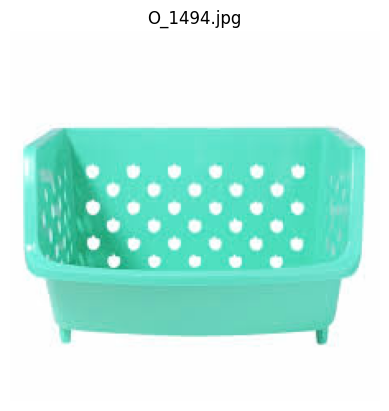

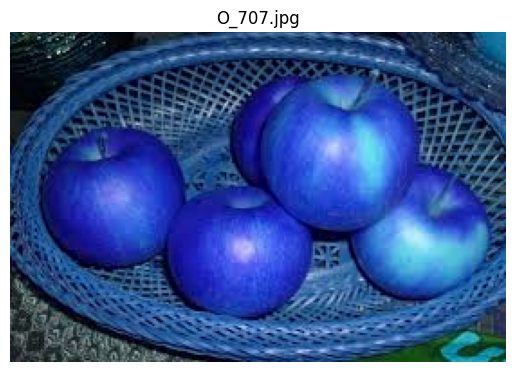

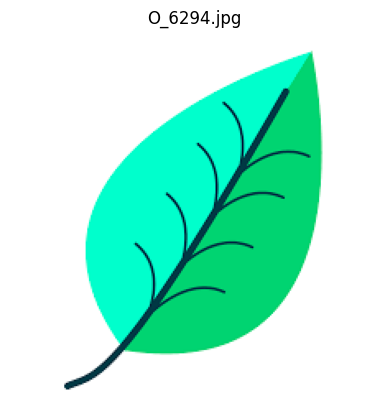

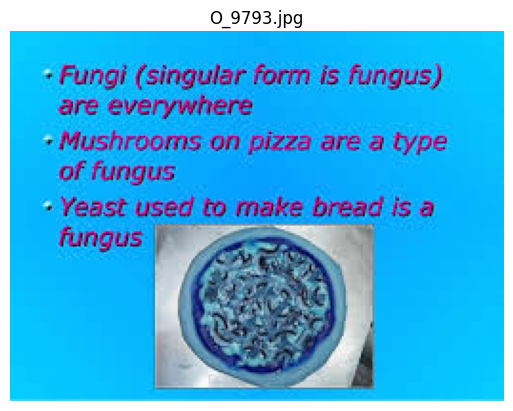

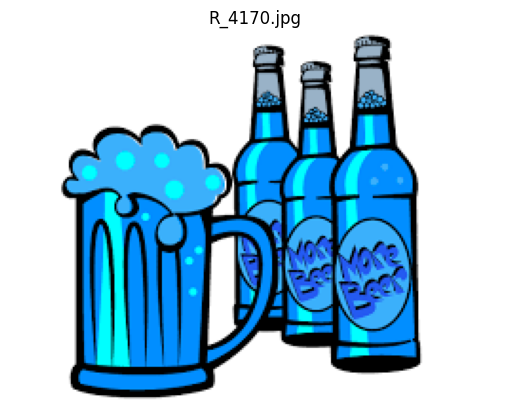

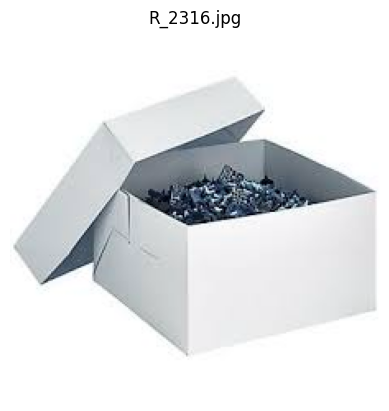

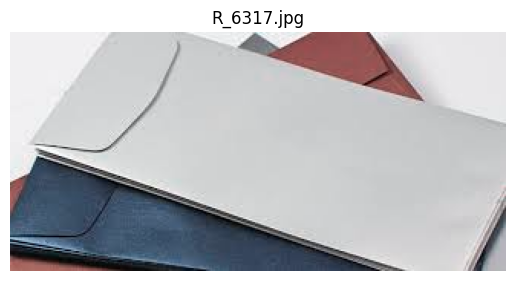

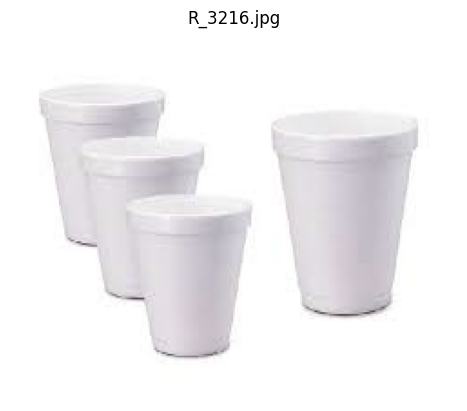

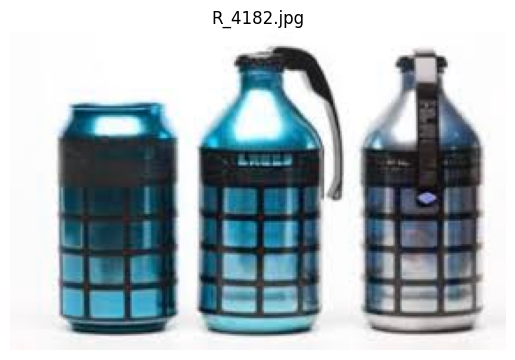

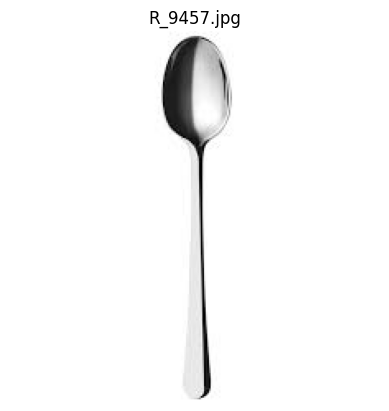

In [ ]:
def load_image(image_id, path):
    img = cv2.imread(os.path.join(path, image_id))
    return img, image_id

def process_images(data_frame, path):
    images = []
    for idx, row in data_frame.iterrows():
        img, image_id = load_image(row['id'], path)
        if img is not None:
            images.append([img, image_id])
            plt.imshow(img)
            plt.title(image_id)
            plt.axis('off')
            plt.show()
    return images


train_images_o = process_images(random_sample, image_folder_train_o)
train_images_r = process_images(random_sample, image_folder_train_r)

In [ ]:
all_images = train_images_o +train_images_r
print(len(all_images))
#print(all_images)

10


In [ ]:
def image_statistics(image_list, path):
    num_images = len(image_list)
    print(f"Total number of images: {num_images}")
    image_shapes = []

    for img_file in image_list:
        img_path = os.path.join(path, img_file)
        print(f"Processing image: {img_path}")
        img = cv2.imread(img_path)
        if img is not None:
            image_shapes.append(img.shape)
        else:
          pass
            #print(f"Failed to read image: {img_path}")

    print(f"Image resolutions: {set(image_shapes)}")

print("Statistics for folder 1:")
image_statistics(list(random_sample.id), image_folder_train_o)

print("\nStatistics for folder 2:")
image_statistics(list(random_sample.id), image_folder_train_r)


Statistics for folder 1:
Total number of images: 10
Processing image: /content/drive/MyDrive/ML/data/train/O/O_1494.jpg
Processing image: /content/drive/MyDrive/ML/data/train/O/R_4170.jpg
Processing image: /content/drive/MyDrive/ML/data/train/O/R_2316.jpg
Processing image: /content/drive/MyDrive/ML/data/train/O/R_6317.jpg
Processing image: /content/drive/MyDrive/ML/data/train/O/O_707.jpg
Processing image: /content/drive/MyDrive/ML/data/train/O/R_3216.jpg
Processing image: /content/drive/MyDrive/ML/data/train/O/O_6294.jpg
Processing image: /content/drive/MyDrive/ML/data/train/O/R_4182.jpg
Processing image: /content/drive/MyDrive/ML/data/train/O/O_9793.jpg
Processing image: /content/drive/MyDrive/ML/data/train/O/R_9457.jpg
Image resolutions: {(225, 225, 3), (183, 275, 3), (194, 259, 3)}

Statistics for folder 2:
Total number of images: 10
Processing image: /content/drive/MyDrive/ML/data/train/R/O_1494.jpg
Processing image: /content/drive/MyDrive/ML/data/train/R/R_4170.jpg
Processing imag

In [ ]:
image_folder_train_o

'/content/drive/MyDrive/ML/data/train/O/'

In [ ]:
def image_statistics(image_list, path):
    num_images = len(image_list)
    print(f"Total number of images: {num_images}")
    image_shapes = []

    for img_file in image_list:
        img_path = os.path.join(path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            image_shapes.append(img.shape)
        else:
          pass
            #print(f"Failed to read image: {img_path}")

    print(f"Image resolutions: {set(image_shapes)}")



def plot_image_distribution(image_list, path):
    resolutions = [cv2.imread(os.path.join(path, img)).shape for img in image_list if cv2.imread(os.path.join(path, img)) is not None]
    widths = [res[1] for res in resolutions]
    heights = [res[0] for res in resolutions]

    plt.figure(figsize=(10, 3))

    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=30, color='blue', alpha=0.7)
    plt.title('Distribution of Image Widths')
    plt.xlabel('Width')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=30, color='green', alpha=0.7)
    plt.title('Distribution of Image Heights')
    plt.xlabel('Height')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


def plot_color_distribution(image_list, path):
    colors = []
    for img_file in image_list:
        img_path = os.path.join(path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            colors.extend(img_rgb.reshape(-1, 3))

    colors = np.array(colors) / 255.0

    plt.figure(figsize=(8, 6))
    plt.scatter(colors[:, 0], colors[:, 1], c=colors, s=1, marker='.')
    plt.title('Color Distribution in Images')
    plt.xlabel('Red')
    plt.ylabel('Green')
    plt.show()


def plot_channel_histograms(image_list, path):
    for img_file in image_list:
        img_path = os.path.join(path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.figure(figsize=(10, 3))

            for i, color in enumerate(['Red', 'Green', 'Blue']):
                plt.subplot(1, 3, i + 1)
                plt.hist(img_rgb[:, :, i].ravel(), bins=256, color=color.lower(), alpha=0.7)
                plt.title(f'{color} Channel Histogram')
                plt.xlabel('Pixel Intensity')
                plt.ylabel('Frequency')

            plt.tight_layout()
            plt.show()
        else:
            #print(f"Failed to read image: {img_path}")
            pass


# Example usage
image_list = list(random_sample.id)


Total number of images: 10
Image resolutions: {(225, 225, 3), (183, 275, 3), (194, 259, 3)}


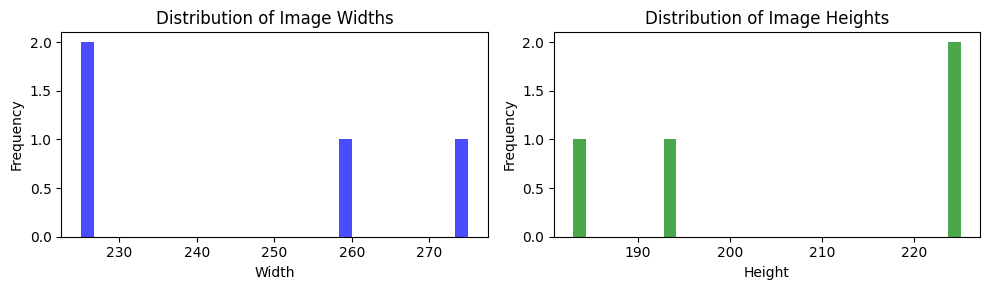

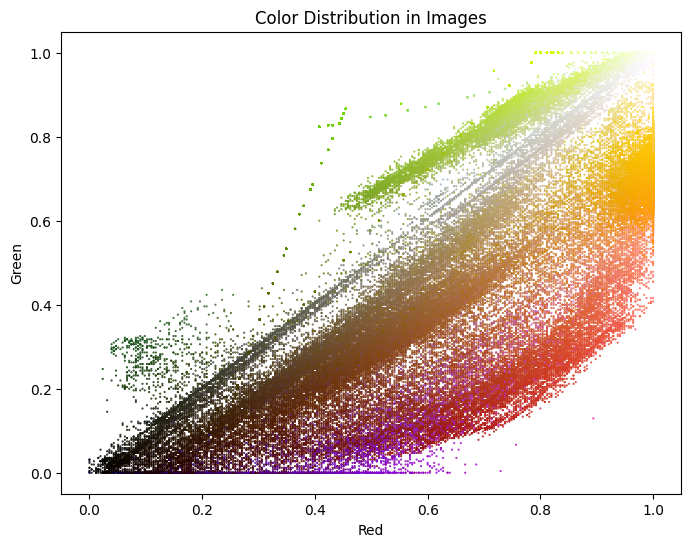

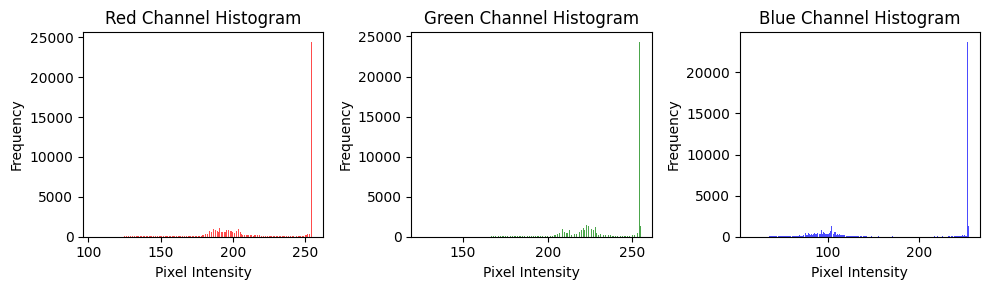

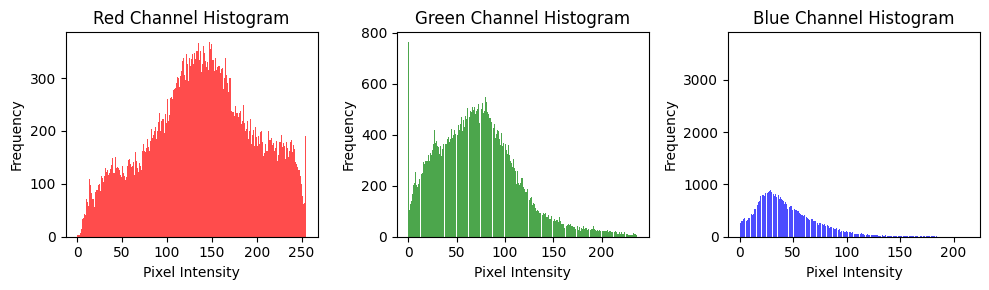

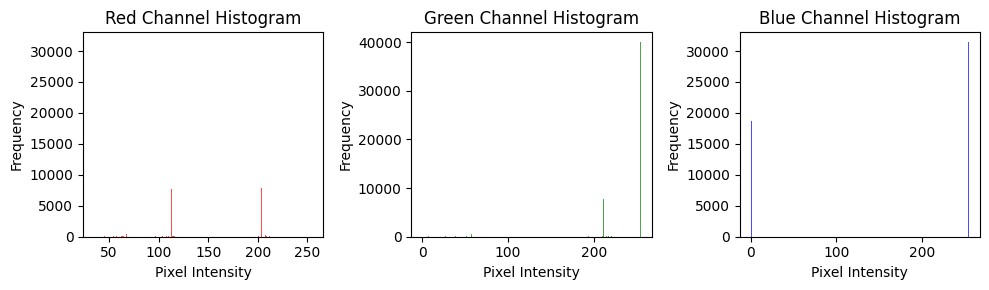

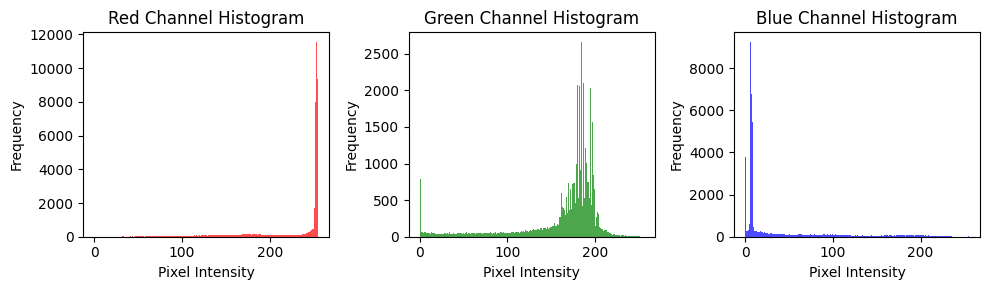

In [ ]:
image_statistics(image_list, image_folder_train_o)
#display_images(image_list, image_folder_train_o, num_images=5)
plot_image_distribution(image_list, image_folder_train_o)
plot_color_distribution(image_list, image_folder_train_o)
plot_channel_histograms(image_list, image_folder_train_o)


Total number of images: 10
Image resolutions: {(225, 225, 3), (204, 247, 3), (195, 258, 3), (156, 324, 3), (180, 281, 3)}
image distribution


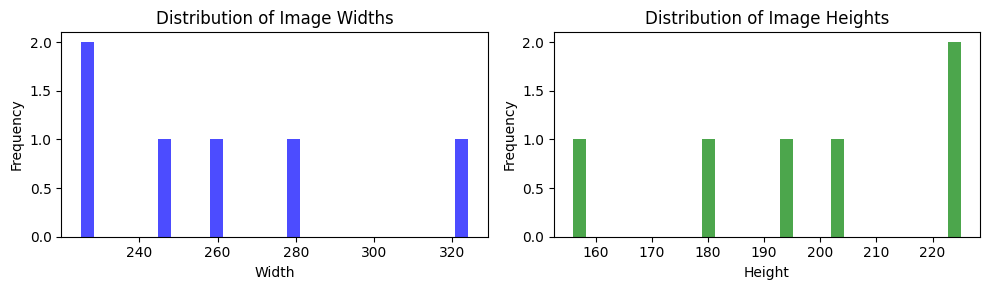

Color distribution


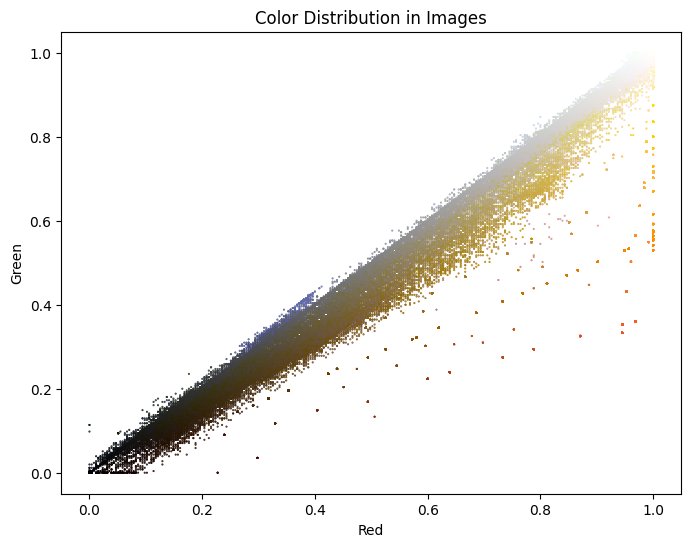

Channel Histogram


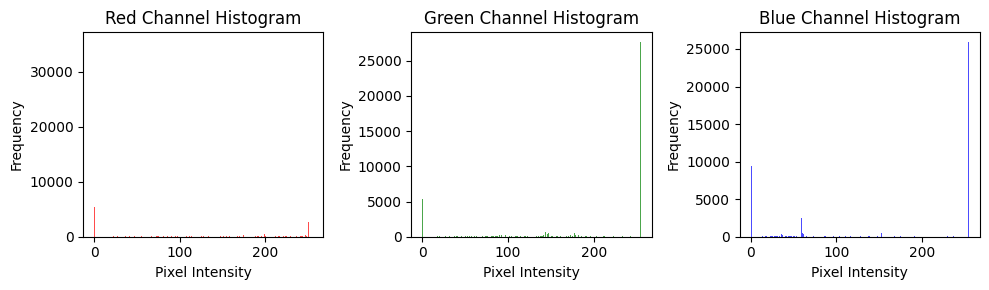

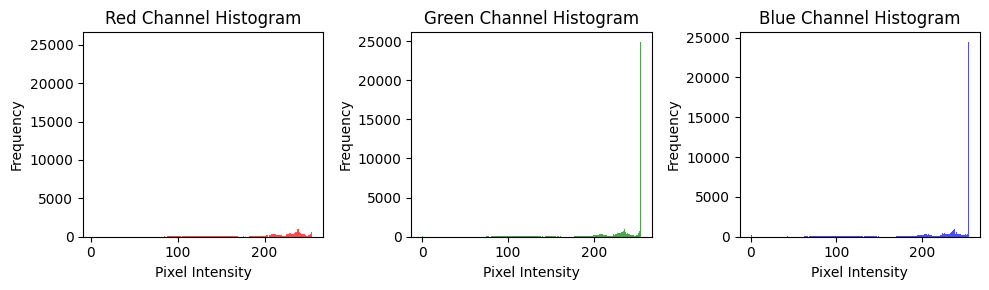

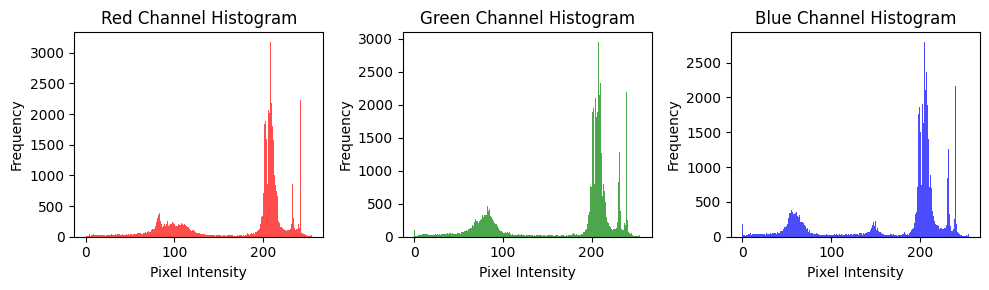

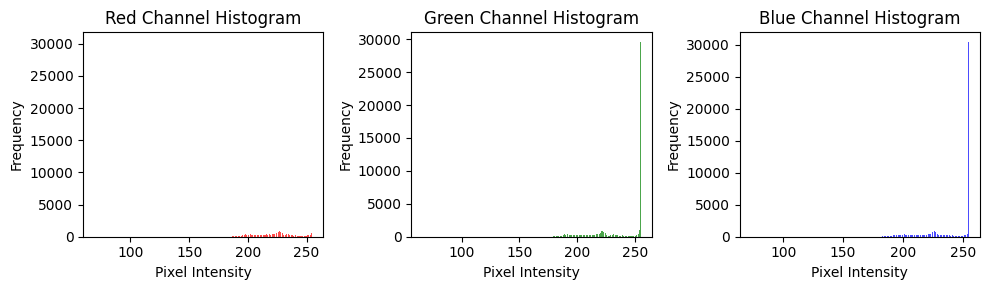

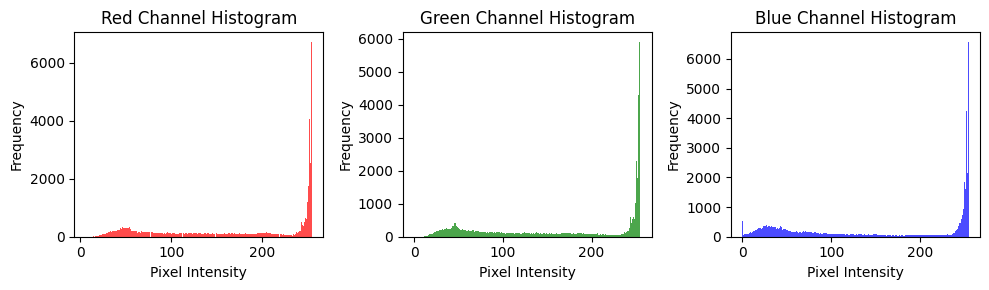

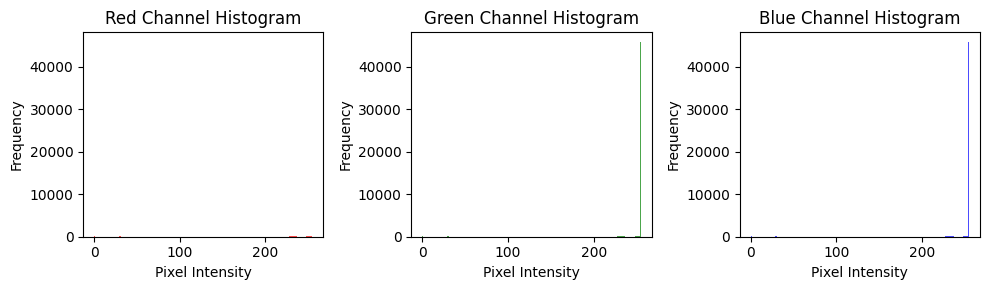

In [ ]:
image_statistics(image_list, image_folder_train_r)
#display_images(image_list, image_folder_train_o, num_images=5)
print('image distribution')
plot_image_distribution(image_list, image_folder_train_r)
print('Color distribution')
plot_color_distribution(image_list, image_folder_train_r)
print('Channel Histogram')
plot_channel_histograms(image_list, image_folder_train_r)


# Observations
The image size width is around  225 on average

The image height is around  225 on average

Both the images have high red scale

Pixel intensity is average


Feature Engineering - PCA EDA

In [ ]:
# bunch of libraries
import os # iterate through files
import random # shuffling files
import cv2 # For processing image
import numpy as np # Storing X and Y values after processing
from sklearn import preprocessing # scalar and PCA
from sklearn.decomposition import IncrementalPCA


# Storing all image pixel values in X and Labels associated with features in Y
X = []
y = []


# Resize all the images in the folder ( Resizing is important otherwise the time processing will be more)
resize_width = 50
resize_height = 50

# How many images are there in the folder?
images_in_folder = 30000

# Get the subfolders present in train folder
y_label = os.listdir(image_folder_train)
y_label.remove('.DS_Store')
print(y_label)

# Store the values in numeric format i.e, 0 means it is organic and 1 means Recyclable
y_label_numeric = {y_value: i for i, y_value in enumerate(y_label)}

# Processing of all images in the folder
for label in y_label:
    y_folder = os.path.join(image_folder_train, label)
    image_files = [os.path.join(y_folder, filename) for filename in os.listdir(y_folder) if filename.endswith('.jpg') and filename != '.DS_Store']

#    image_files = [os.path.join( y_folder, filename) for filename in os.listdir( y_folder) if filename.endswith('.jpg')]

    # shuffle all the files
    random.shuffle(image_files)
    #print(image_files)

    # We are resizing, flattening and finally features are extracted into X and Store the labels in Y

    for image_file in image_files[:images_in_folder // len(y_label)]:
        image = cv2.imread(image_file)
        image = cv2.resize(image, (resize_width, resize_height)) # resizing 50 * 50
        flattened_image = image.flatten() # image is flattened
        X.append(flattened_image) # storing all the pixel values in X_list
        y.append(y_label_numeric[label])  # 0 for Organic and 1 for Recyclable


print("--------------------STEP 1----PreProcessing of images is completed successfully---------------------------")


# Store the values of X and Y in numpy rather than list which would be easy for PCA
X = np.array(X)
#print(X)
y = np.array(y)
#print(y)


# Normalization of features using scaler
# Reference : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler_norm = preprocessing.StandardScaler()
X = scaler_norm.fit_transform(X)

print("-------------------------STEP 2 -------------Normalization of feature vector is done successfully using scaler-----------------------------")


# Reducing the dimension of features using PCA which will help us to extract latent features and reduce dimensions

# Define variables required for PCA
total_samples, total_features = X.shape
number_of_components = min(total_samples, total_features)

# Define PCA (Incremental PCA)
incremental_pca = IncrementalPCA(n_components=number_of_components)

# Process in batches otherwise the run time will be forever

# Reference - https://stackoverflow.com/questions/66716370/batch-size-and-training-time
batch_size = total_samples
for i in range(0, X.shape[0], batch_size):
    X_batch_pca = X[i:i + batch_size]
    incremental_pca.partial_fit(X_batch_pca)

# Reference : https://scikit-learn.org/stable/auto_examples/decomposition/plot_incremental_pca.html
X_pca = incremental_pca.transform(X)




['R', 'O']
--------------------STEP 1----PreProcessing of images is completed successfully---------------------------
-------------------------STEP 2 -------------Normalization of feature vector is done successfully using scaler-----------------------------


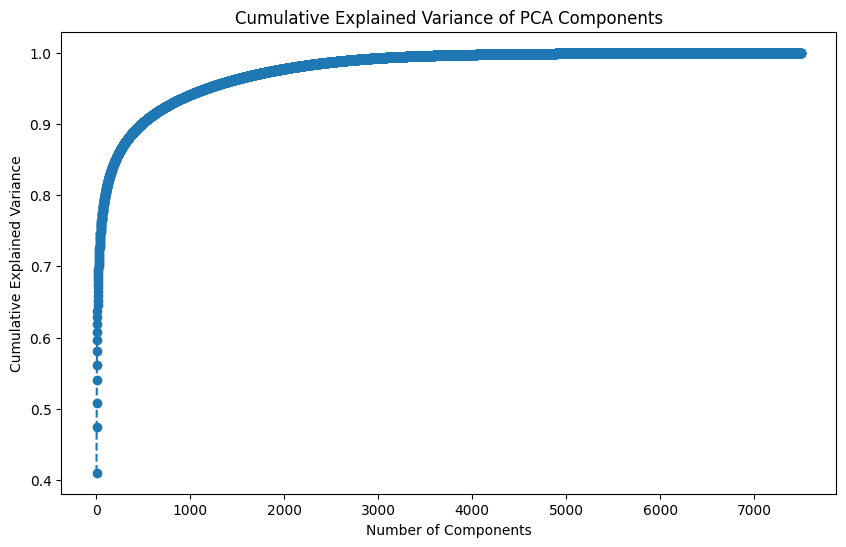

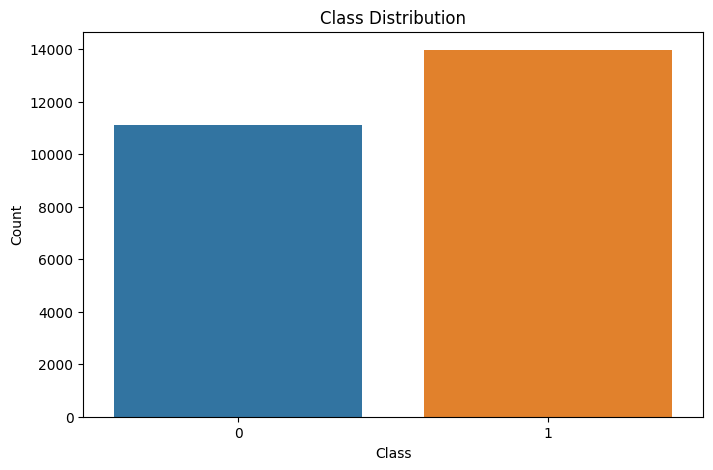

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the explained variance ratio of PCA components
explained_variance_ratio = incremental_pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()



# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:

# Import t-SNE for visualization
from sklearn.manifold import TSNE

# ------------------- STEP 7 --------------- Additional Analysis ------------------------------

# Visualize t-SNE representation of the data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE representation
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis', alpha=0.7)
plt.title('t-SNE Representation of Waste classification data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Class')
plt.show()

NameError: ignored